<a href="https://colab.research.google.com/github/Gautamadarshi/Book-Recommendation-System/blob/Adarshi/Book_Recommendendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Jay Maa Sarswati**

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Loading the Datasets

In [7]:
book_url = "https://raw.githubusercontent.com/novus-afk/BookRecommender/master/Books.csv"
users_url = "https://raw.githubusercontent.com/novus-afk/BookRecommender/master/Users.csv"
ratings_url = "https://raw.githubusercontent.com/novus-afk/BookRecommender/master/Ratings.csv"

books = pd.read_csv(book_url)
users = pd.read_csv(users_url)
ratings = pd.read_csv(ratings_url)

<ipython-input-7-172146175586>:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv(book_url)


Viewing My DataSet

In [8]:
#DataSet first view
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [9]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [10]:
ratings.head(10)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
6,276736,3257224281,8
7,276737,0600570967,6
8,276744,038550120X,7
9,276745,342310538,10


In [12]:
books.shape

(271360, 8)

In [13]:
users.shape

(278858, 3)

In [14]:
ratings.shape

(1149780, 3)

In [15]:
books.describe

<bound method NDFrame.describe of               ISBN                                         Book-Title  \
0       0195153448                                Classical Mythology   
1       0002005018                                       Clara Callan   
2       0060973129                               Decision in Normandy   
3       0374157065  Flu: The Story of the Great Influenza Pandemic...   
4       0393045218                             The Mummies of Urumchi   
...            ...                                                ...   
271355  0440400988                         There's a Bat in Bunk Five   
271356  0525447644                            From One to One Hundred   
271357  006008667X  Lily Dale : The True Story of the Town that Ta...   
271358  0192126040                        Republic (World's Classics)   
271359  0767409752  A Guided Tour of Rene Descartes' Meditations o...   

                 Book-Author Year-Of-Publication  \
0         Mark P. O. Morford         

In [16]:
users.describe

<bound method NDFrame.describe of         User-ID                            Location   Age
0             1                  nyc, new york, usa   NaN
1             2           stockton, california, usa  18.0
2             3     moscow, yukon territory, russia   NaN
3             4           porto, v.n.gaia, portugal  17.0
4             5  farnborough, hants, united kingdom   NaN
...         ...                                 ...   ...
278853   278854               portland, oregon, usa   NaN
278854   278855  tacoma, washington, united kingdom  50.0
278855   278856           brampton, ontario, canada   NaN
278856   278857           knoxville, tennessee, usa   NaN
278857   278858                dublin, n/a, ireland   NaN

[278858 rows x 3 columns]>

In [17]:
ratings.describe

<bound method NDFrame.describe of          User-ID         ISBN  Book-Rating
0         276725   034545104X            0
1         276726   0155061224            5
2         276727   0446520802            0
3         276729   052165615X            3
4         276729   0521795028            6
...          ...          ...          ...
1149775   276704   1563526298            9
1149776   276706   0679447156            0
1149777   276709   0515107662           10
1149778   276721   0590442449           10
1149779   276723  05162443314            8

[1149780 rows x 3 columns]>

In [19]:
books.tail()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...
271359,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...


In [20]:
users.tail()

,User-ID,Location,Age
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN
278857,278858,"dublin, n/a, ireland",NaN


In [21]:
ratings.tail()

,User-ID,ISBN,Book-Rating
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10
1149779,276723,05162443314,8


**Check Dublicate Values**

In [25]:
# DataSet Dublicate Value Count
books.duplicated().sum()

0

In [26]:
users.duplicated().sum()

0

In [28]:
ratings.duplicated().sum()

0

# Misssing Value/Null Vlues

In [31]:
def missing_values(dataframe):
  '''The function will calculate the missing values and present it in a tabular form '''
  # Calculate the number of missing values in each column
  missing_values_count = dataframe.isnull().sum()

  # Calculate the percentage of missing values in each column
  missing_values_percentage = round(dataframe.isnull().mean().mul(100), 2)

  # Create a table containing the number and percentage of missing values
  missing_values_table = pd.concat([missing_values_count, missing_values_percentage], axis=1)
  missing_values_table = missing_values_table.rename(columns={0: 'Count of Missing Values', 1: '[% of Total Value]'})
  
  # Sort the table by the percentage of missing values in descending order
  missing_values_table = missing_values_table.sort_values('[% of Total Value]', ascending=False)

  # Reset the index of the table
  missing_values_table = missing_values_table.reset_index().rename(columns={'index': 'Column Name'})

  return missing_values_table

In [32]:
# Missing values/null values count
missing_values(books)

,Column Name,Count of Missing Values,[% of Total Value]
0,ISBN,0,0.0
1,Book-Title,0,0.0
2,Book-Author,1,0.0
3,Year-Of-Publication,0,0.0
4,Publisher,2,0.0
5,Image-URL-S,0,0.0
6,Image-URL-M,0,0.0
7,Image-URL-L,3,0.0


In [33]:
missing_values(users)

,Column Name,Count of Missing Values,[% of Total Value]
0,Age,110762,39.72
1,User-ID,0,0.00
2,Location,0,0.00


In [34]:
missing_values(ratings)

,Column Name,Count of Missing Values,[% of Total Value]
0,User-ID,0,0.0
1,ISBN,0,0.0
2,Book-Rating,0,0.0


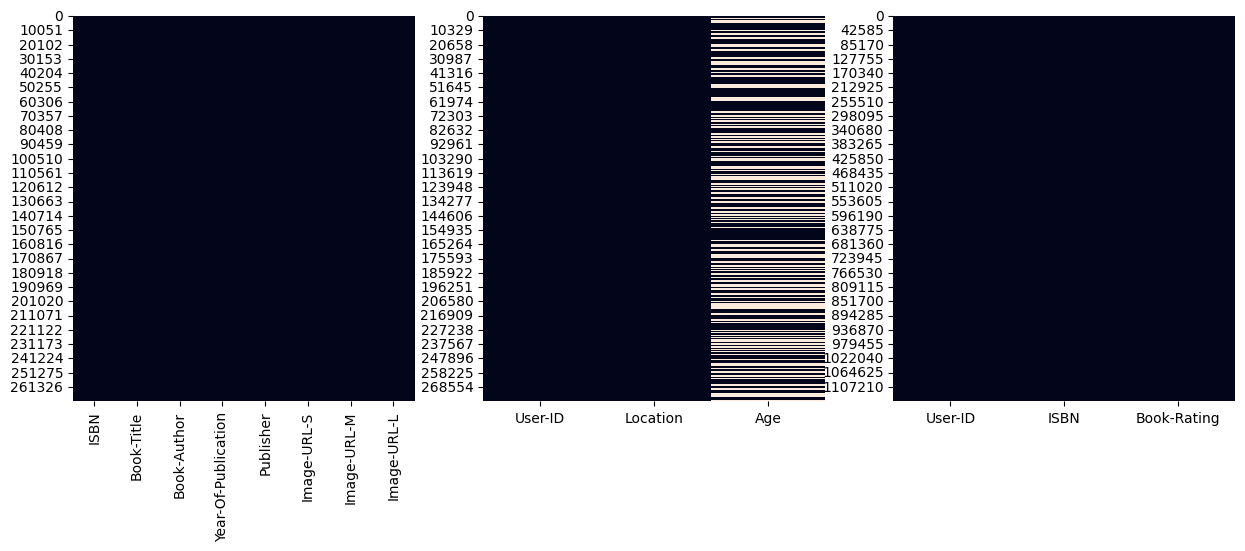

In [35]:
# visulazing the missing values
fig,(ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 5))
sns.heatmap(books.isnull(),cbar=False, ax=ax1)
sns.heatmap(users.isnull(),cbar=False, ax=ax2)
sns.heatmap(ratings.isnull(),cbar=False, ax=ax3)
plt.show()




*   **The books csv contains number of rows are 271360 and numbers of columns are 8.**

*   **The users csv contains number of rows are 278858 and number of columns are 3.**


*   **The ratings csv contains number of rows are 1149780 and number of columns are 3.**

*   **There are almost 40% missing values in age columns of the users csv.**





#**Understanding Your Variables**

In [36]:
# DataSet columns
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [37]:
users.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [38]:
ratings.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [39]:
# DataSet Describe
books.describe(include= 'all').round(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [40]:
users.describe(include='all').round(3)

,User-ID,Location,Age
count,278858.000,278858,168096.000
unique,NaN,57339,NaN
top,NaN,"london, england, united kingdom",NaN
freq,NaN,2506,NaN
mean,139429.500,NaN,34.751
std,80499.515,NaN,14.428
min,1.000,NaN,0.000
25%,69715.250,NaN,24.000
50%,139429.500,NaN,32.000
75%,209143.750,NaN,44.000


In [41]:
ratings.describe(include='all').round(2)


,User-ID,ISBN,Book-Rating
count,1149780.00,1149780,1149780.00
unique,NaN,340556,NaN
top,NaN,0971880107,NaN
freq,NaN,2502,NaN
mean,140386.40,NaN,2.87
std,80562.28,NaN,3.85
min,2.00,NaN,0.00
25%,70345.00,NaN,0.00
50%,141010.00,NaN,0.00
75%,211028.00,NaN,7.00


Variable